In [107]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
from sklearn import preprocessing, datasets
labelencoder = LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
from sklearn.linear_model import LinearRegression

In [85]:
#importing dataset
df = pd.read_csv('dodgers.csv')

In [86]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [103]:
#creating a new column id, in descending order
df['id'] = range(len(df))
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,id
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,1
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,2
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,3
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO,76
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO,77
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO,78
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO,79


In [87]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [88]:
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


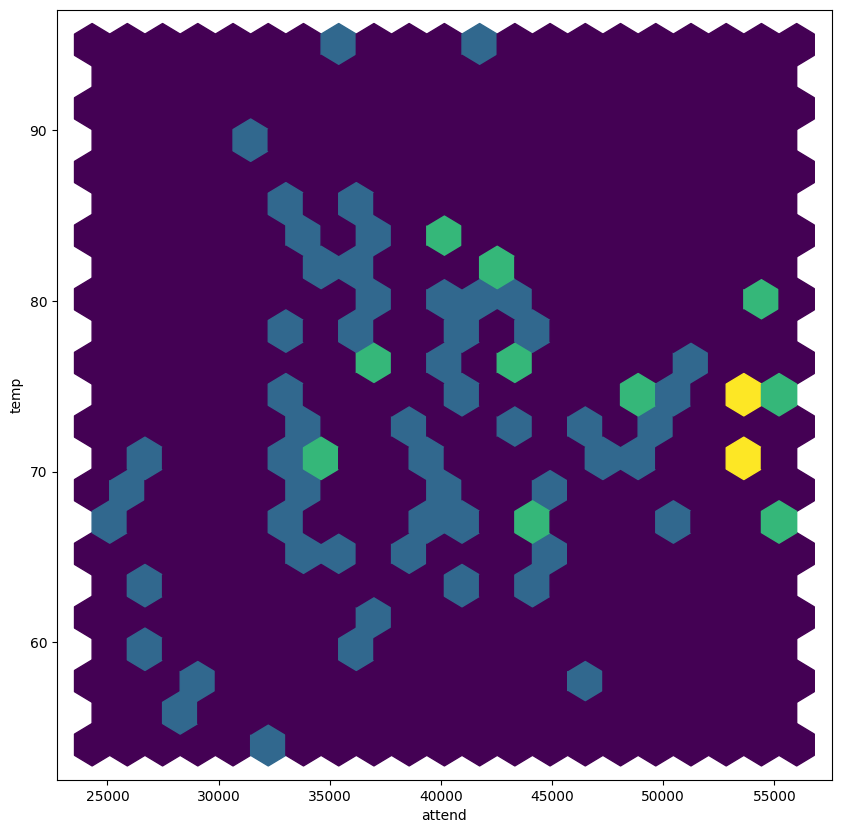

In [89]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hexbin(df['attend'], df['temp'], gridsize=20)
ax.set_ylabel('temp')
ax.set_xlabel('attend')
plt.show()

in the above graph we're looking to see if the temperature affects attendance. It does look like there are very attendance numbers if it's below 60 or above 85 degrees

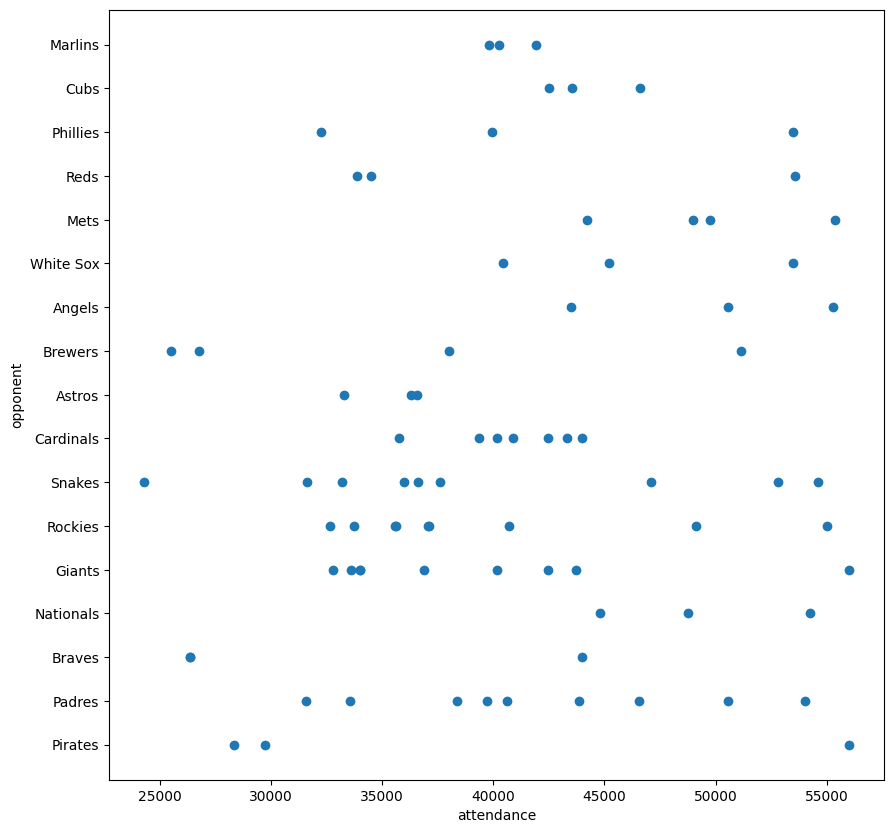

In [90]:
#scatter plot comparing attendance versus the opponent
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['opponent'])
ax.set_ylabel('opponent')
ax.set_xlabel('attendance')
plt.show()

There are a few opponents who appear to always have low attendance ratings and some that have a higher attendance ratings

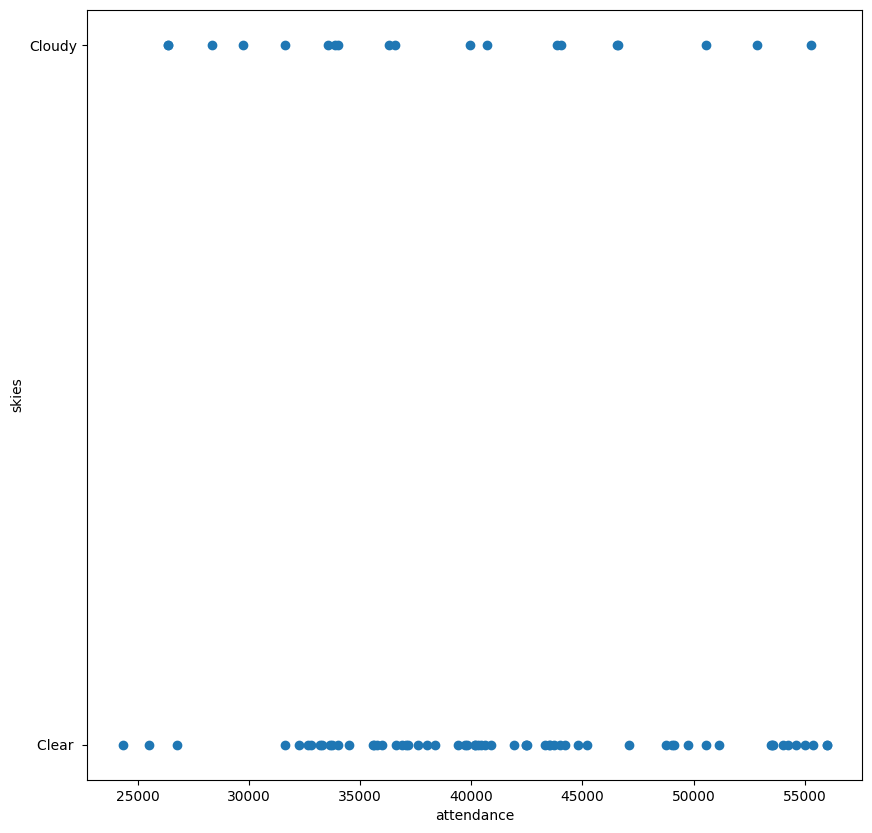

In [91]:
#scatter plot comparing attendance versus skies
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['skies'])
ax.set_ylabel('skies')
ax.set_xlabel('attendance')
plt.show()

skies does not appear to be a factor in attendance. Both clear and cloudy days have an equal distribution of attendees. 

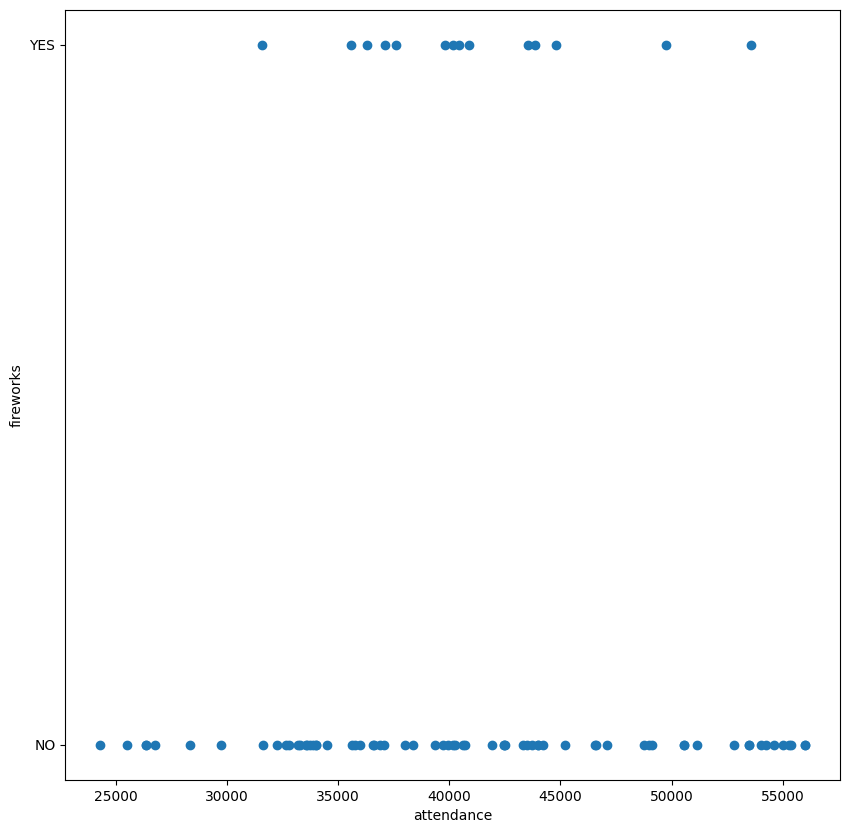

In [92]:
#scatter plot comparing attendance to fireworks
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['fireworks'])
ax.set_ylabel('fireworks')
ax.set_xlabel('attendance')
plt.show()

fireworks does appear to have a slight affect on attendance but there isn't a big enough sample size to be sure. 

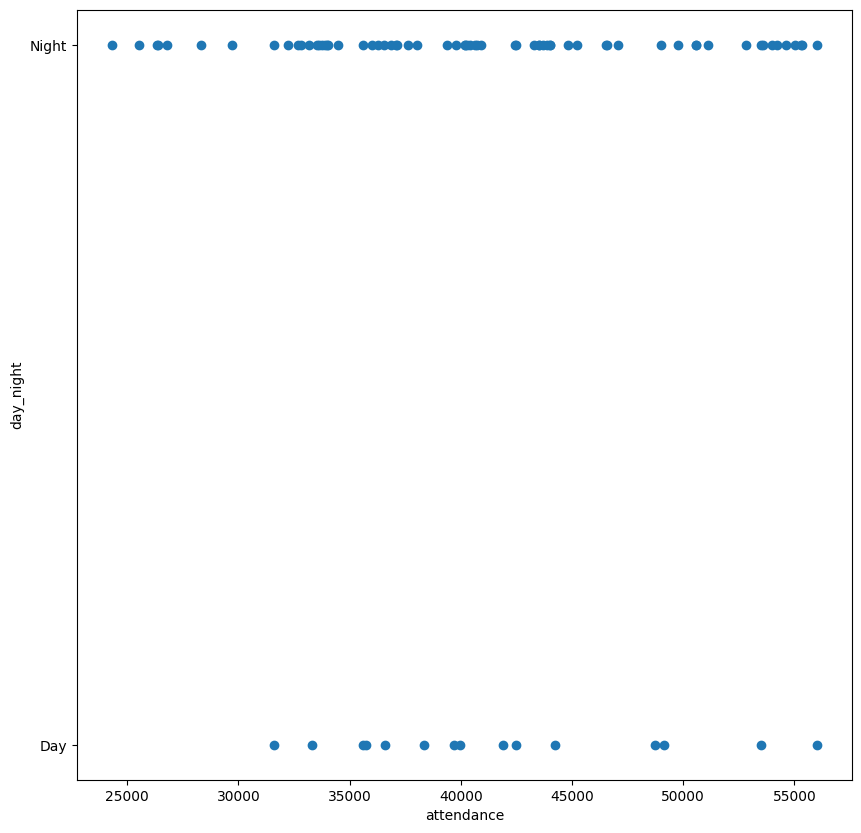

In [93]:
#scatter plot comparing atendance to day_night
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['day_night'])
ax.set_ylabel('day_night')
ax.set_xlabel('attendance')
plt.show()

night games appear to have an equal distribution of attendance numbers. However, day games don't have any numbers below 30000. This could be due to other factors (like the opponent). 

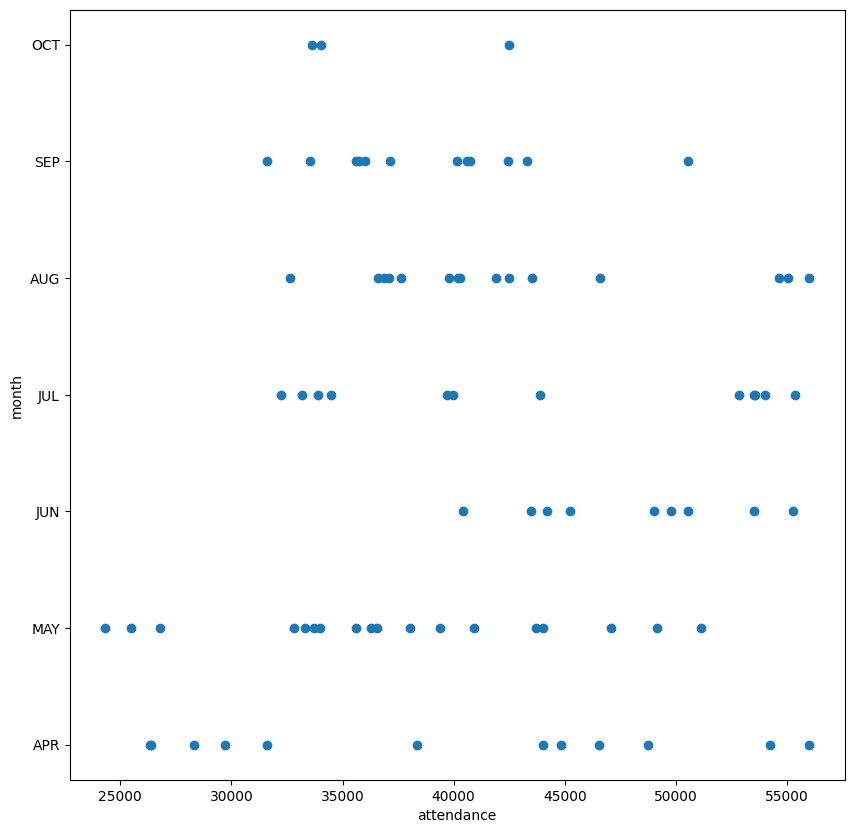

In [94]:
#scatter plot comparing atendance to month
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['month'])
ax.set_ylabel('month')
ax.set_xlabel('attendance')
plt.show()

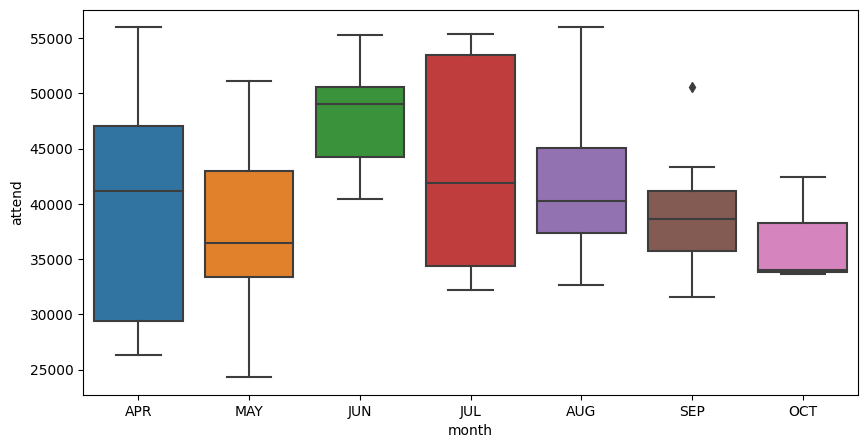

In [95]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'month', y = 'attend', data = df)
plt.show()

the last variable that we're going to look at is the month. It looks like June games always have high attendance numbers and May and April are the only months with low numbers, possible due to rain or temperature. 

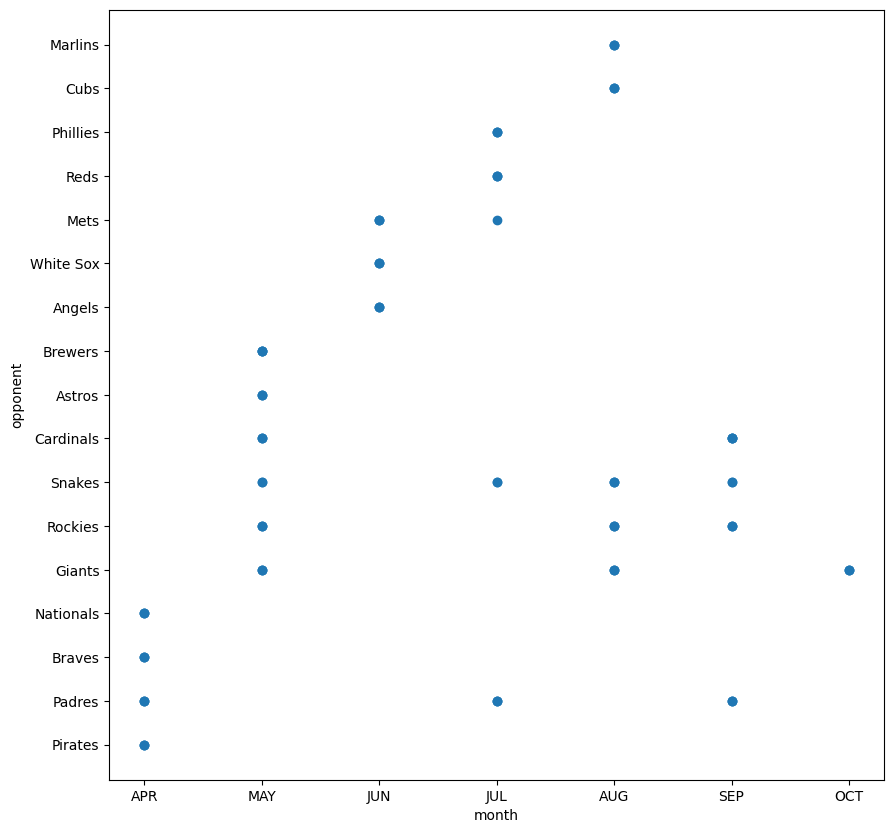

In [96]:
#scatter plot comparing attendance versus the opponent
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['month'], df['opponent'])
ax.set_ylabel('opponent')
ax.set_xlabel('month')
plt.show()

Since there are certain opponents in which there are higher attendance and months that have higher attendance, I wanted to see if this is because certain opponents only played during certain months. All of the games in June have a higher attendance, and there are only three opponents that play during June. The Mets only appear in one other month (which tends to have higher attendance), and the other two opponents don't appear in any other month. This might mean that the reason why June overall has the highest attendance could be because people want to see these opponents, which only play in June. 

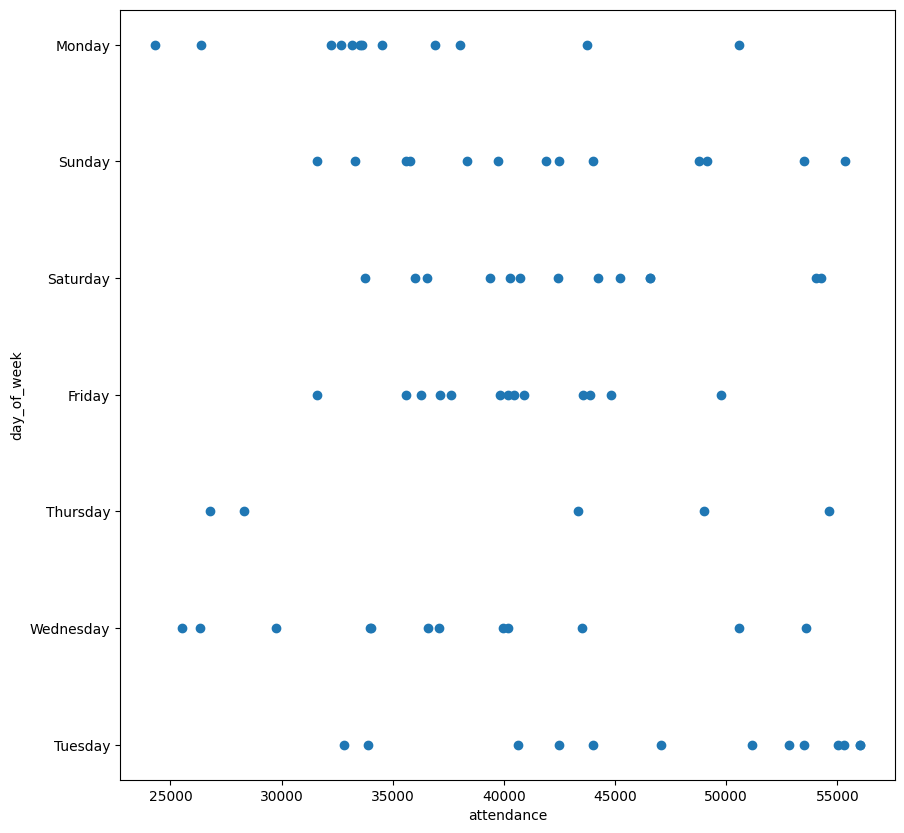

In [97]:
#scatter plot comparing atendance to day_of_week
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['day_of_week'])
ax.set_ylabel('day_of_week')
ax.set_xlabel('attendance')
plt.show()

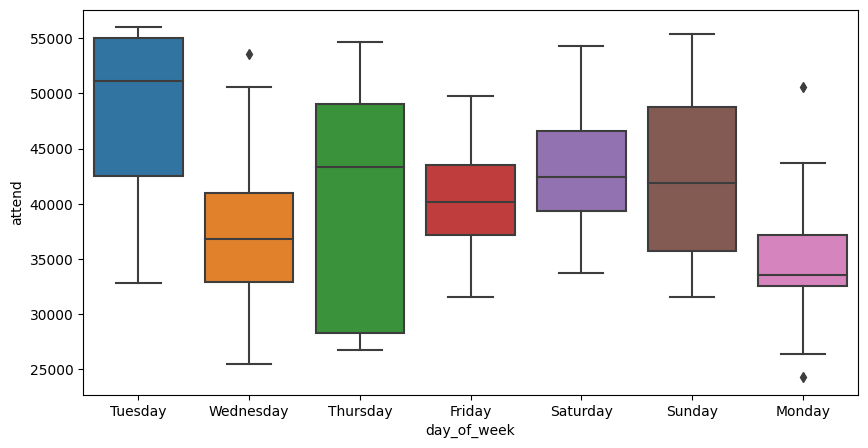

In [98]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'day_of_week', y = 'attend', data = df)
plt.show()

It appears that Tuesdays, Sundays, and Saturdays have the overall highest attendance numbers. While Mondays have the lowest. 

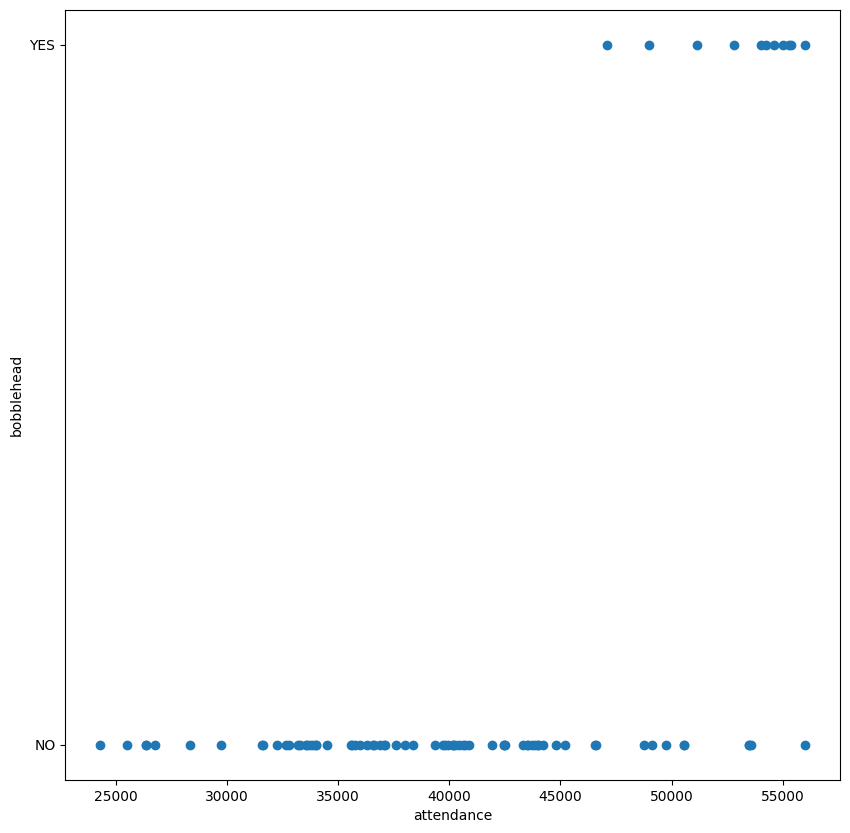

In [99]:
#scatter plot comparing atendance to day_of_week
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['attend'], df['bobblehead'])
ax.set_ylabel('bobblehead')
ax.set_xlabel('attendance')
plt.show()

bobbleheads appear to only be sold during high attendance games. It's doubtful that people are coming to the game just to buy the bobbleheads. So, it's more likely that bobbleheads are being sold becasue it's going to be a high attendance game due to other factors (day of the week, opponent, month, etc) 

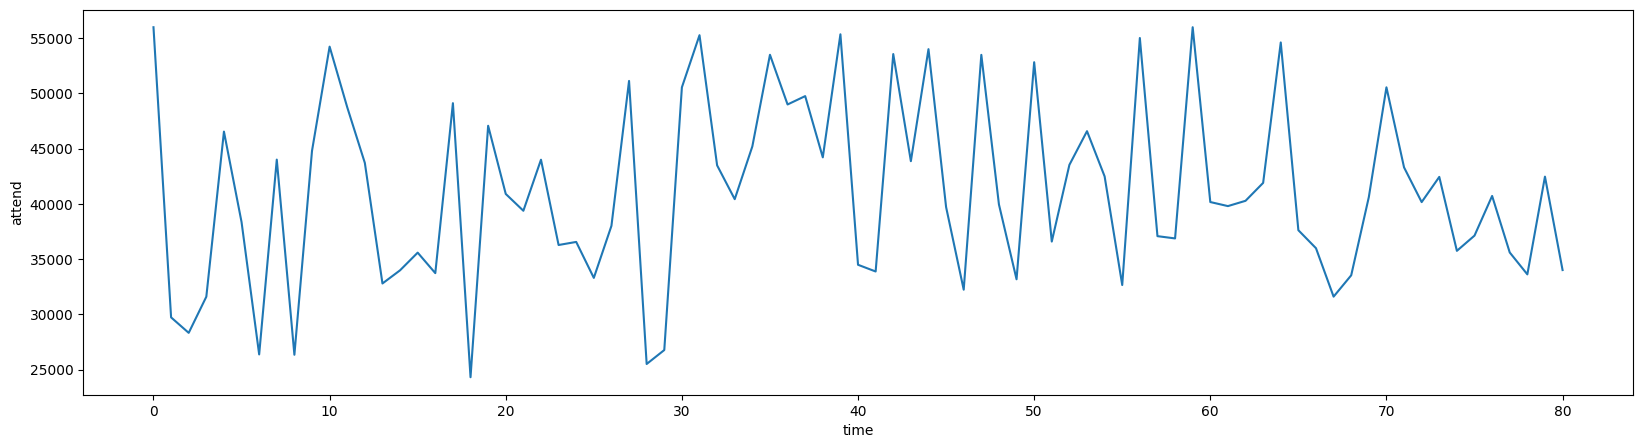

In [106]:
#line graph
plt.figure(figsize=(20,5))
plt.plot(df['id'], df['attend'])
plt.ylabel('attend')
plt.xlabel('time')
plt.show()

I wanted to create a graph just showing how the attendence changes through forward time. Since the month and day columns are mixed but appear to be in the correct order, I just added a new numerical column so that I could graph that. Here we can see that the attendance goes up and down continuously in the entire 7 month period that this data covers. There doesn't appear to be any trends that can be accounted for. 

In [100]:
# Find the pearson correlations matrix
corr = df.corr(method = 'pearson')
corr

C:\Users\brean\AppData\Local\Temp\ipykernel_30184\2281272359.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


,day,attend,temp
day,1.000000,0.027093,-0.127612
attend,0.027093,1.000000,0.098951
temp,-0.127612,0.098951,1.000000


this correlation method only uses numerical columsn so it's overall helpful. There doesn't seem to be a significant correlation between attendance and the day of the month or the temperature. 

Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

We are given very limited data for this analysis. Many more factors go into determing attendenance like ticket prices, the teams wins and losses, the current economy, and events or services offered. It would also be helpful to look at the overall trend over the coures of several years, instead of just a single season. However, from the limited information given, we can assume that people go to the most games when the weather is between 60 and 85 degress, when bobbleheads are being sold, on Tuesdays, Saturdays, or Sundays, in June, July, or August, when the Mets, Angels, Pirates, or Giants are playing. 